In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram


In [22]:
df = pd.read_csv("../../glass-clustering.csv")

In [23]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [24]:
df.shape

(214, 9)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [26]:
scaler = StandardScaler()

In [27]:
scaled_df = scaler.fit_transform(df)

In [28]:
model = AgglomerativeClustering()

In [29]:
cluster_labels = model.fit_predict(scaled_df)

In [30]:
df['labels'] = cluster_labels

In [31]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [32]:
sil_scores = []
dav_scores = []
cal_scores = []
for i in range(2,10):   
    model = AgglomerativeClustering(n_clusters=i,linkage='single')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))

    model = AgglomerativeClustering(n_clusters=i,linkage='complete')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


    model = AgglomerativeClustering(n_clusters=i,linkage='average')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


    model = AgglomerativeClustering(n_clusters=i,linkage='ward')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


In [33]:
print(F"Best Silhoutte Scores : {max(sil_scores)} ")
print(F"Best Davies Bouldin Scores : {max(dav_scores)} ")
print(F"Best Calinski Harabasz Scores : {max(cal_scores)} ")

Best Silhoutte Scores : 0.6734995165322221 
Best Davies Bouldin Scores : 1.3769329922790408 
Best Calinski Harabasz Scores : 55.89773954009622 


In [34]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

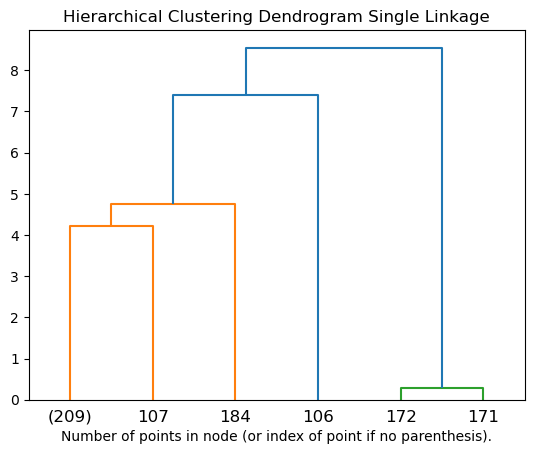

In [35]:
model = AgglomerativeClustering(linkage='single',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Single Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

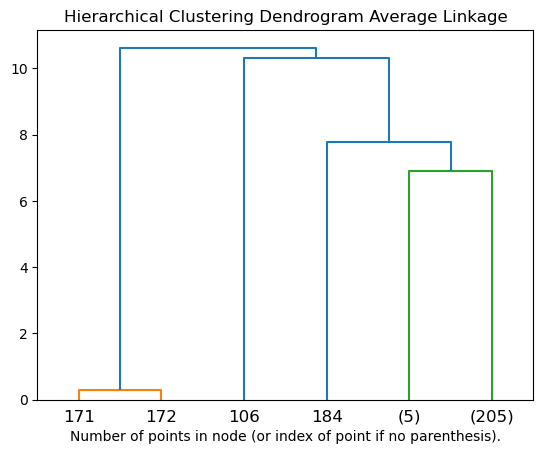

In [36]:
model = AgglomerativeClustering(linkage='average',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Average Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

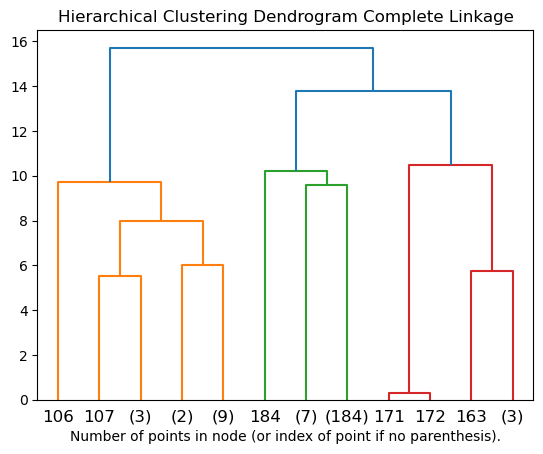

In [37]:
model = AgglomerativeClustering(linkage='complete',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Complete Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

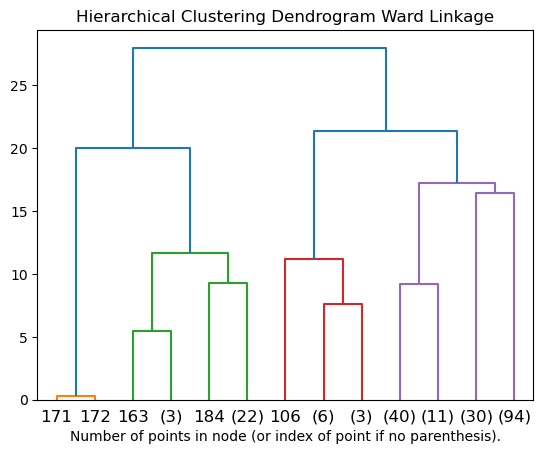

In [38]:
model = AgglomerativeClustering(linkage='ward',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Ward Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()